In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [137]:
df = pd.read_csv('https://query.data.world/s/dgyj35citerdqk36rou52lgmfhfity',header=None)
df.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [138]:
df.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [139]:
##Extract features and labels
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [140]:
#Split the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [141]:
#Instaniate the standardscaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [143]:
df_X_train_std = pd.DataFrame(X_train_std)
df_X_test_std = pd.DataFrame(X_test_std)

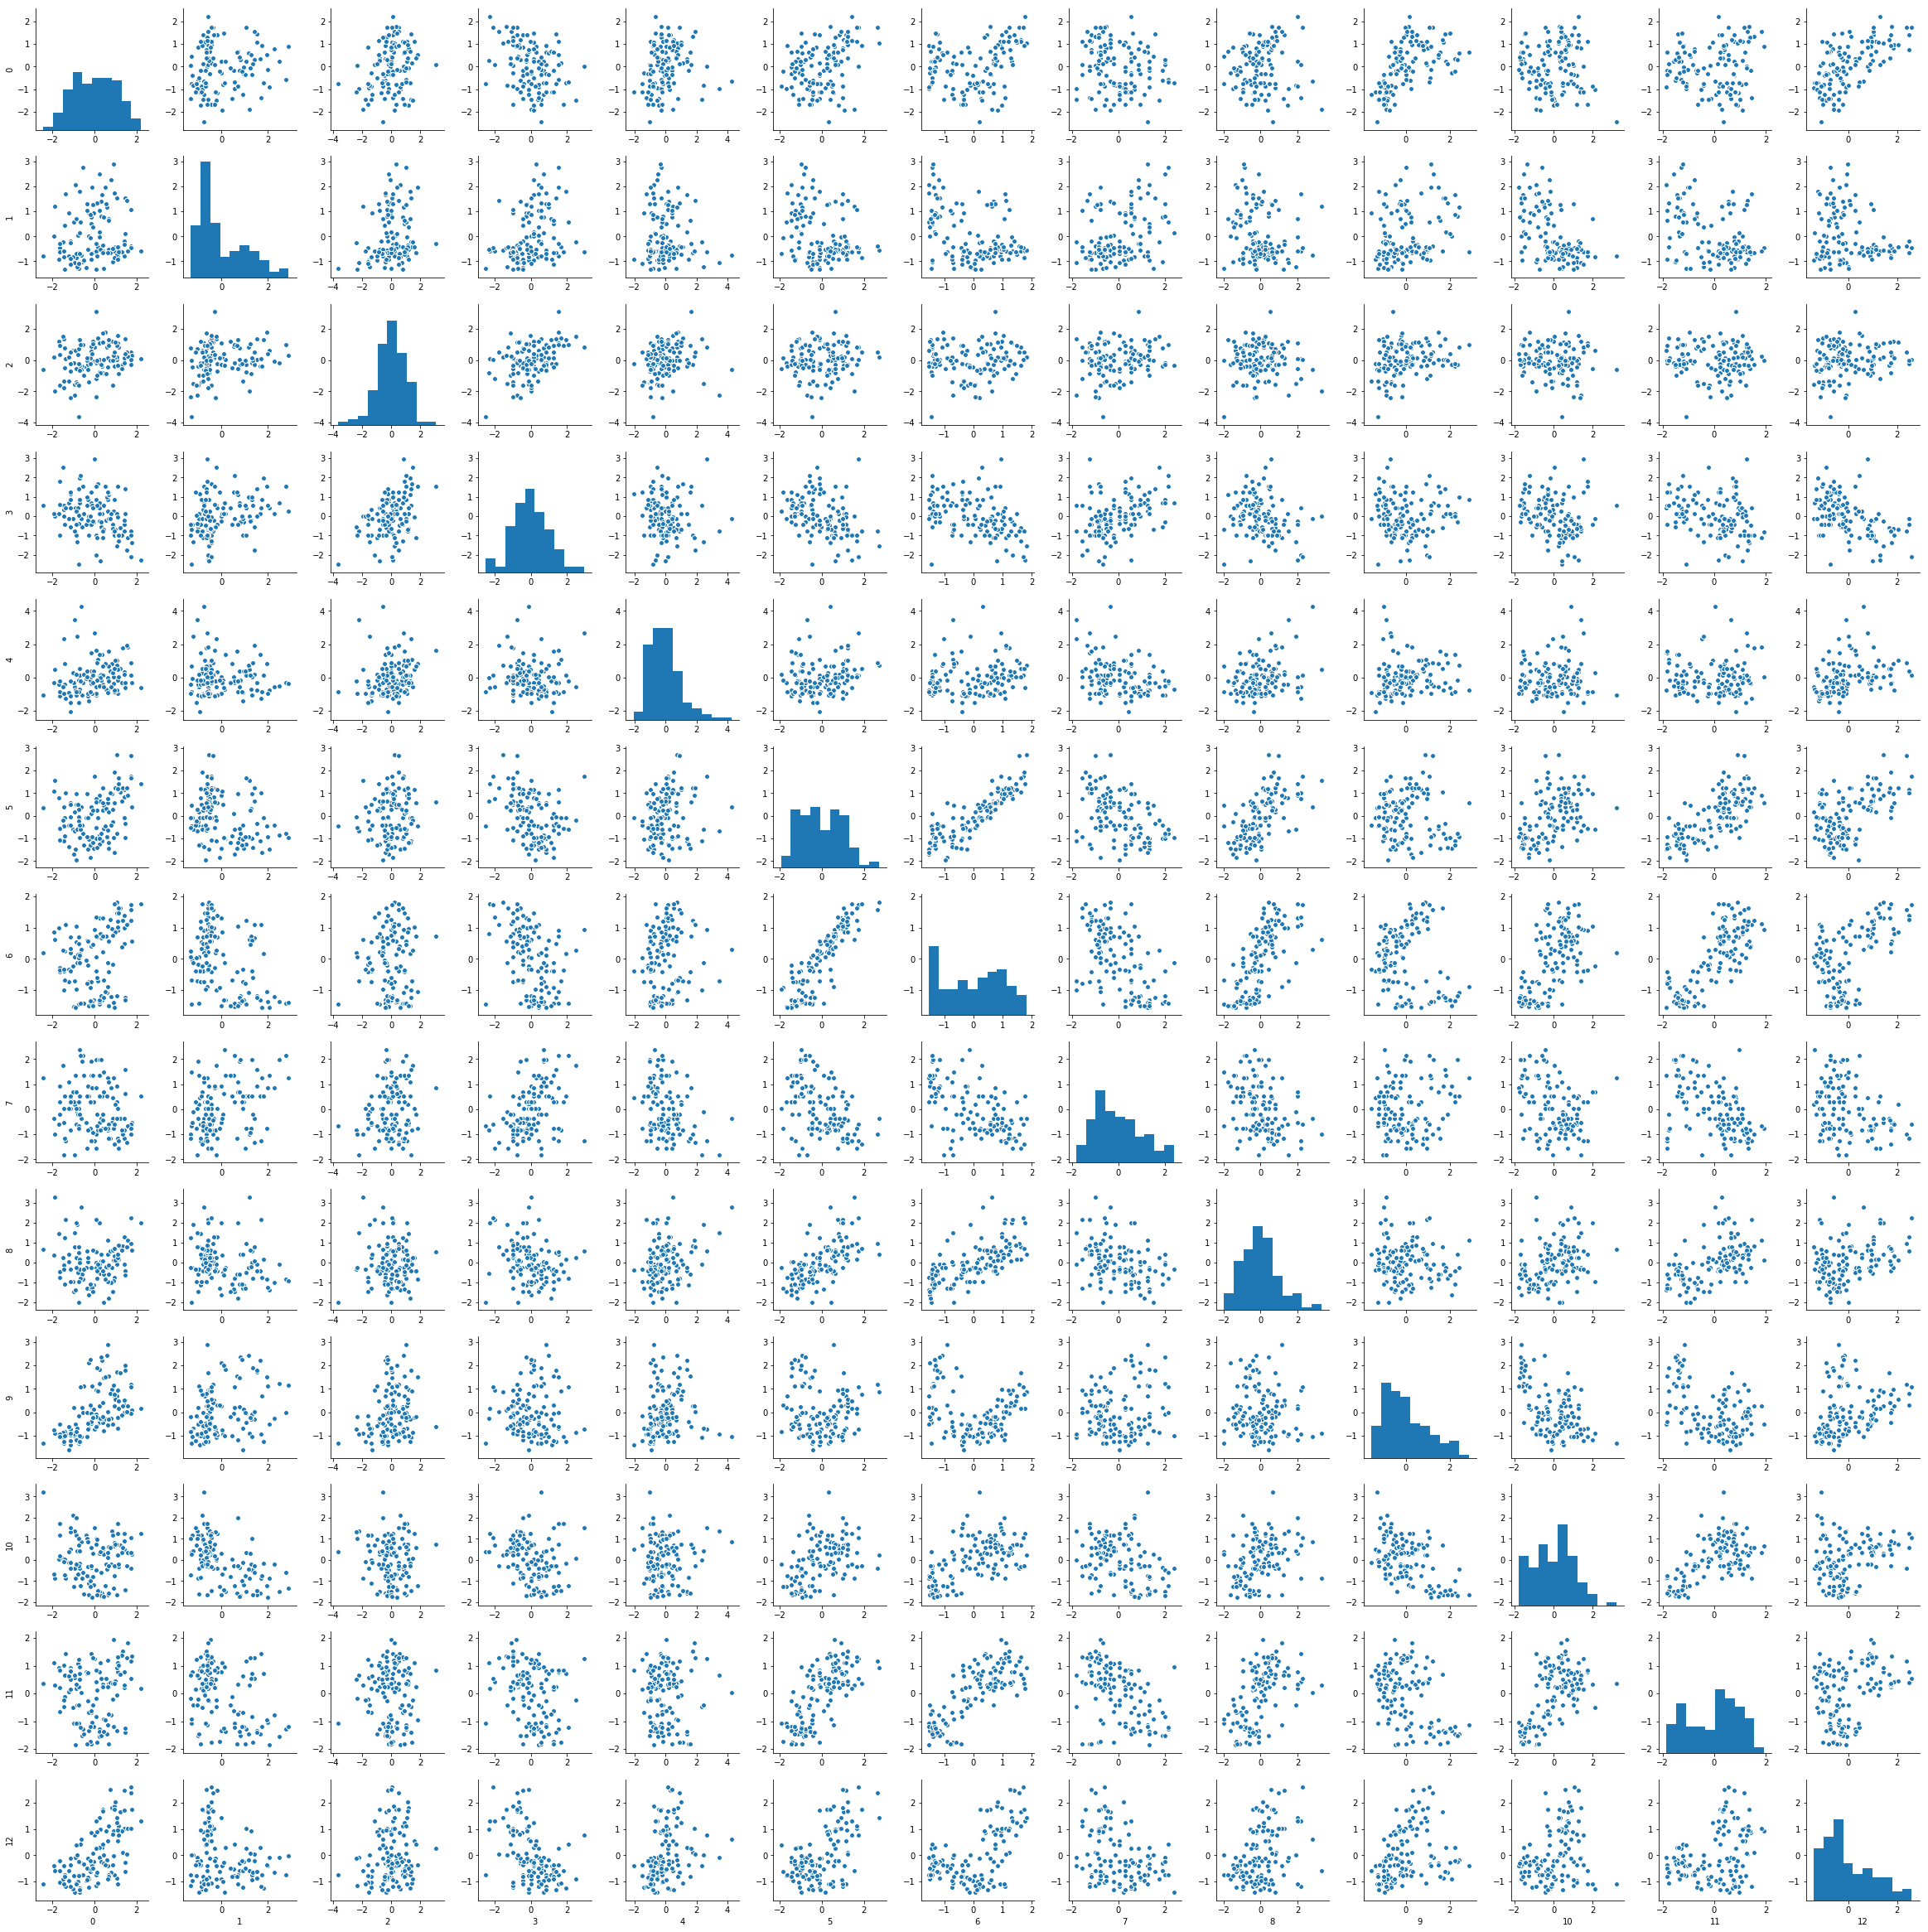

In [144]:
sns.pairplot(df_X_train_std)
plt.show()

In [145]:
lr = LogisticRegression(penalty='l1',C=0.1)

In [146]:
lr.fit(X_train_std,y_train)
print('The accuracy score for training set : {}'.format(lr.score(X_train_std,y_train)))
print('The accuracy score for test set : {}'.format(lr.score(X_test_std,y_test)))

The accuracy score for training set : 0.9838709677419355
The accuracy score for test set : 0.9814814814814815


### As we see from above score model is not overfitting to training data set

In [147]:
lr.intercept_

array([-0.38384289, -0.15808388, -0.7004011 ])

In [148]:
lr.coef_

array([[ 0.2805318 ,  0.        ,  0.        , -0.02805997,  0.        ,
         0.        ,  0.71006868,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23605398],
       [-0.64395906, -0.06881879, -0.05719487,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92678404,
         0.06015198,  0.        , -0.37105365],
       [ 0.        ,  0.06145069,  0.        ,  0.        ,  0.        ,
         0.        , -0.636575  ,  0.        ,  0.        ,  0.49835242,
        -0.35809893, -0.57068908,  0.        ]])

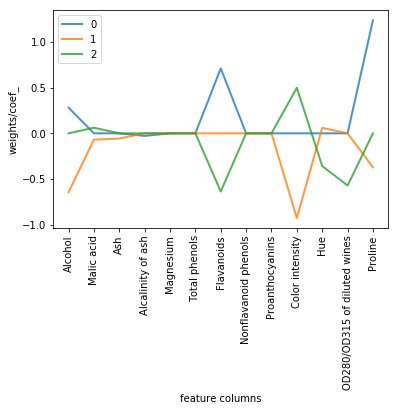

In [149]:
#plotting coef_ of all classes
for i in range(3):
    plt.plot(lr.coef_[i],label=i,alpha=0.8,linewidth=2)

plt.legend()
plt.xticks(range(0,13),df.columns[1:],rotation=90)
plt.xlabel('feature columns')
plt.ylabel('weights/coef_')
plt.show()

In [150]:
params = []
weights = []
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1',C=10**int(c),random_state=0)
    lr.fit(X_train_std,y_train)
    params.append(10**int(c))
    weights.append(lr.coef_[1])

In [151]:
params

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

In [152]:
weights = np.array(weights)

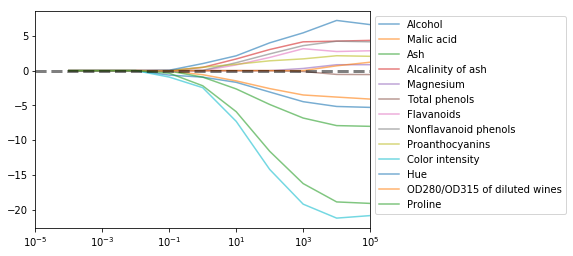

In [153]:
fig = plt.figure()
ax = plt.subplot(111)
for column in range(weights.shape[1]):
    plt.plot(params,weights[:,column],label=df.columns[column+1],alpha=0.6)
    plt.xscale('log')
    plt.xlim([10**(-5),10**(5)])
plt.axhline(0,linestyle='--',color='black',linewidth=3,alpha=0.5)
ax.legend(loc='upper center',bbox_to_anchor=(1.30, 1),ncol=1, fancybox=True)
plt.show()

### As we can see if we penalize the model with strong regularization parameter beyond(C'<'10**-1), the weights will be zero